# Importing Some modules for data preprocessing and importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset from given url "http://bit.ly/w-data"

In [2]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plot dataset into Sctatter plot to visulising data into 2-D plots

<Figure size 1152x648 with 0 Axes>

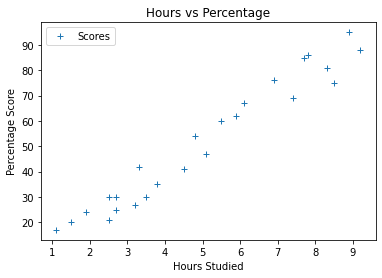

In [7]:
plt.figure(figsize=(16,9))
df.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## To perform linnear regression we divide a datset into two part one is dependent part another is independent part to satisfying the linner regression equation i.e Y = mX + C where, Y is dependent part , x is independent part, m is slop of stright line, C is intercept of of a line

In [15]:
Y=df.drop(['Hours'], axis=1)
X=df.drop(['Scores'], axis=1)
Y.head(), X.head()

(   Scores
 0      21
 1      47
 2      27
 3      75
 4      30,
    Hours
 0    2.5
 1    5.1
 2    3.2
 3    8.5
 4    3.5)

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3, test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(X_train,Y_train)

LinearRegression()

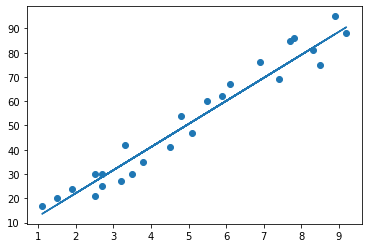

In [21]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [27]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores
y_pred

    Hours
18    6.1
17    1.9
12    4.5
23    6.9
15    8.9


array([[61.07240199],
       [21.18113131],
       [45.87572744],
       [68.67073926],
       [87.66658244]])

In [38]:
# Y_test['Scores'].values.tolist()
import numpy as np
list(np.concatenate(y_pred).flat)

[61.07240198875215,
 21.181131306544952,
 45.87572744314941,
 68.67073926155352,
 87.66658244355695]

In [39]:
# Comparing Actual vs Predicted
dt = pd.DataFrame({'Actual': Y_test['Scores'].values.tolist(), 'Predicted': list(np.concatenate(y_pred).flat)})  
dt 

,Actual,Predicted
0,67,61.072402
1,24,21.181131
2,41,45.875727
3,76,68.670739
4,95,87.666582


In [41]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [90.990855]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 5.656974488548368
